In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import statsmodels.api as sm
import math

# Esercizio 1

$$ f(x) = \frac{6}{a^3}(ax-x^2)\cdot I_{[0,a]}(x)$$

#### Punto 1
_Dimostrate che è una funzione di densità di probabilità per ogni valore reale $a>0$_

Per dimostrare che è una funzione di densità di probabilità dobbiamo verificare che integri ad uno sul suo dominio e che sia positiva sul suo dominio.

Verifichiamo che integri ad uno:

$$ \int_{-\infty}^{\infty} f(x) \,dx $$

$$ \int_{0}^{a} \frac{6}{a^3}(ax-x^2)\,dx $$

$$ \frac{6}{a^3}\cdot\int_{0}^{a} (ax-x^2)\,dx $$

$$ \frac{6}{a^2}\cdot\int_{0}^{a} (x)\,dx - \frac{6}{a^3}\cdot\int_{0}^{a} (x^2)\,dx $$

$$ \frac{6}{a^2}\cdot \left[ \frac{x^2}{2} \right]_{0}^a  - \frac{6}{a^3}\cdot \left[ \frac{x^3}{3} \right]_{0}^a $$

$$ 3-2 = 1$$

Verifichiamo ora $f(x)>0  \forall x \in D_x$

Sappiamo per certo che $\frac{6}{a^3}$ è positivo perchè $a>0$ per vincolo.\
ora $ax-x^2 = x(a-x)$ ha come soluzioni $x \geq 0$ che è sempre vera (il dominio va da zero ad a) e $x \leq a$ che è sempre vera perchè x non può andare oltre a (sempre per il dominio) 

Verrificato che $f(x)$ è sempre positiva




#### Punto 2
 _Calcolate il valore atteso di $X$ esprimendola in funzione di $a$(suggerimento: ragionando su alcune proprietà
geometriche, potete giustificare il risultato senza fare conti)._


$$
\int_0^a x f(x) \, dx
$$

$$
\int_0^a x \left( \frac{6}{a^3} (ax - x^2) \right) \, dx
$$

$$
\int_0^a \frac{6}{a^3} x (ax - x^2) \, dx
$$

$$
\int_0^a \frac{6}{a^3} (a x^2 - x^3) \, dx
$$

$$
\frac{6}{a^3} \int_0^a (a x^2 - x^3) \, dx
$$

$$
\frac{6}{a^3} \left( a \int_0^a x^2 \, dx - \int_0^a x^3 \, dx \right)
$$

$$
\int_0^a x^2 \, dx = \left[ \frac{x^3}{3} \right]_0^a = \frac{a^3}{3}
$$

$$
\int_0^a x^3 \, dx = \left[ \frac{x^4}{4} \right]_0^a = \frac{a^4}{4}
$$

$$
\frac{6}{a^3} \left( a \cdot \frac{a^3}{3} - \frac{a^4}{4} \right)
$$

$$
\frac{6}{a^3} \left( \frac{a^4}{3} - \frac{a^4}{4} \right)
$$

$$
\frac{6}{a^3} \cdot \frac{a^4}{12}
$$

$$
\frac{6 a}{12} = \frac{a}{2}
$$


#### Punto 3
_Indichiamo con $F$ la funzione di ripartizione di $X$ . Ricavate la forma analitica di $F(X)$, esprimendola in
funzione di $x$ e $a$._



$$ F_X(x)=\frac{6}{a^2}\cdot\int_{0}^{x} (t)\,dt - \frac{6}{a^3}\cdot\int_{0}^{x} (t^2)\,dt $$

$$ F_X(x)=\frac{3x^2}{a^2} - \frac{2x^3}{a^3} $$

#### Punto 4
 _Supponete, solo in questo punto, che $a=\frac{1}{2}$. Scrivete ed eseguite del codice che disegni il grafico della
funzione $F$ definita al punto precedente._



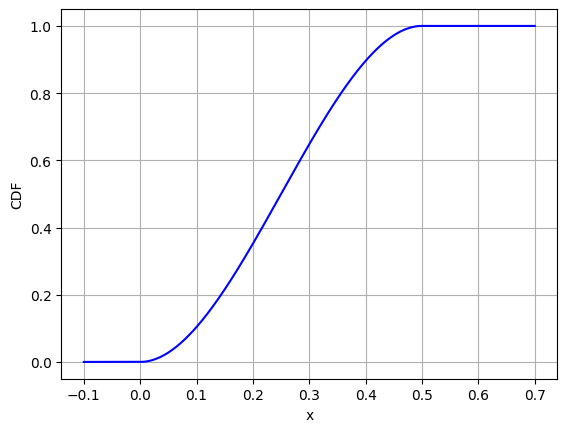

In [6]:
def cdf(x, a):
    if x < 0:
        return 0
    elif x <= a:
        return (3 * x**2) / a**2 - (2 * x**3) / a**3
    else:
        return 1

a = 1/2
x_values = np.linspace(-0.1, 0.7, 30000)
y_values = [cdf(x, a) for x in x_values]

plt.plot(x_values, y_values, color='blue')
plt.xlabel('x')
plt.ylabel('CDF')
plt.grid(True)
plt.show()

#### Punto 5
A primo acchito potrebbe sembrare una distribuzione normale ma non lo è. Basti pensare al fatto che la PDF è una parabola che tocca i punti 0 e a.
In questo caso la CDF non assume la forma corretta di quella normale 



#### Punto 6
_Calcolate fa varianza di $X$ esprimendola in funzione di $a$._



$$Var(X) = E(X^2)-E(X)^2$$
$$
E(X^2) = \int_{0}^{a} x^2 f(x) \, dx
$$

$$
f(x) = \frac{6}{a^3}(ax - x^2) \cdot I_{[0,a]}(x)
$$

$$
E(X^2) = \int_{0}^{a} x^2 \cdot \frac{6}{a^3}(ax - x^2) \, dx
$$

$$
E(X^2) = \frac{6}{a^3} \int_{0}^{a} x^2 (ax - x^2) \, dx
$$

$$
E(X^2) = \frac{6}{a^3} \int_{0}^{a} (ax^3 - x^4) \, dx
$$

$$
E(X^2) = \frac{6}{a^3} \left( \int_{0}^{a} ax^3 \, dx - \int_{0}^{a} x^4 \, dx \right)
$$

$$
\int_{0}^{a} ax^3 \, dx = a \int_{0}^{a} x^3 \, dx = a \left[ \frac{x^4}{4} \right]_{0}^{a} = a \cdot \frac{a^4}{4} = \frac{a^5}{4}
$$

$$
\int_{0}^{a} x^4 \, dx = \left[ \frac{x^5}{5} \right]_{0}^{a} = \frac{a^5}{5}
$$

$$
E(X^2) = \frac{6}{a^3} \left( \frac{a^5}{4} - \frac{a^5}{5} \right)
$$

$$
E(X^2) = \frac{6}{a^3} \cdot \frac{a^5}{20}
$$

$$
E(X^2) = \frac{6a^5}{20a^3}
$$

$$
E(X^2) = \frac{3a^2}{10}
$$
$$Var(X) = \frac{3a^2}{10}-\frac{a^2}{4} = \frac{a^2}{20}$$

# Esercizio 3



In [7]:
df=pd.read_csv('risultati.csv',sep=',',decimal='.')
df

,matricola,genere,eta,punteggio,tempo
0,4302229,F,20,20.49,24.0
1,3199114,F,21,8.53,9.0
2,8399478,F,31,5.28,9.0
3,2658176,F,35,17.37,21.0
4,1492818,M,35,23.34,22.0
...,...,...,...,...,...
663,4290912,M,33,18.99,22.0
664,3153118,F,18,16.83,17.0
665,2522926,M,35,13.62,17.0
666,0839910,M,30,10.88,24.0


In [8]:
df.isna().sum()

matricola    0
genere       0
eta          0
punteggio    0
tempo        0
dtype: int64

In [9]:
genere=df['genere']
genere

0      F
1      F
2      F
3      F
4      M
      ..
663    M
664    F
665    M
666    M
667    M
Name: genere, Length: 668, dtype: object

In [10]:
ctgenere=genere.value_counts(normalize=True)
ctgenere

genere
F    0.538922
M    0.461078
Name: proportion, dtype: float64

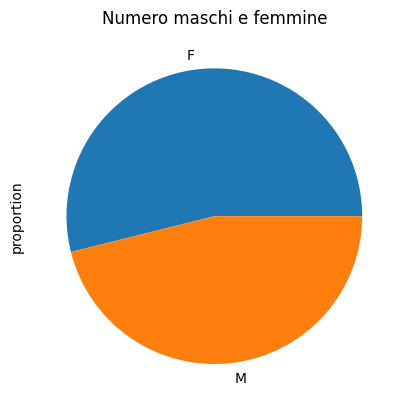

In [11]:
ctgenere.plot.pie(legend=False)
plt.title("Numero maschi e femmine")
plt.show()

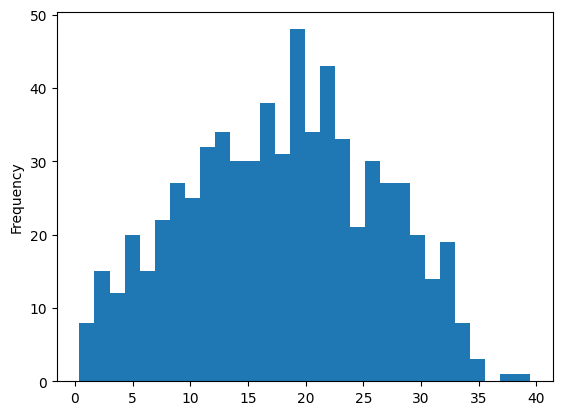

In [12]:
punteggio=df['punteggio']
punteggio.plot.hist(bins=30)
plt.show()

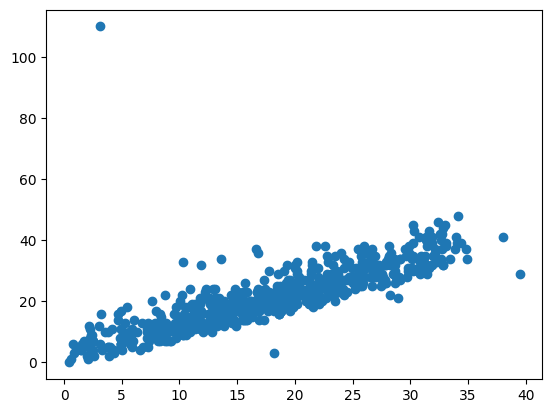

In [13]:
tempo=df['tempo']
plt.scatter(punteggio,tempo)
plt.show()

In [14]:
punteggio.corr(tempo)

0.8134245358444538

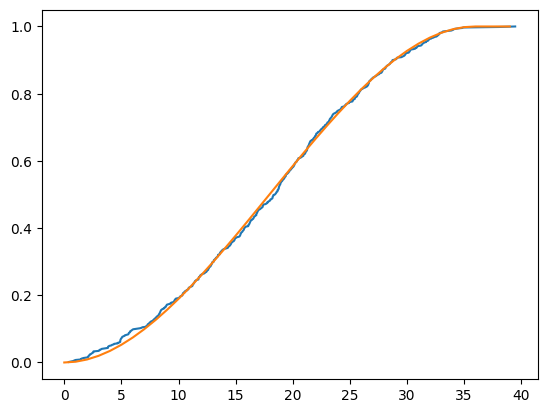

In [16]:
ecdf=sm.distributions.ECDF(punteggio)
x=np.arange(0,40,1)
plt.plot(ecdf.x,ecdf.y)
plt.plot([cdf(i,2*punteggio.mean()) for i in x])
plt.show()

In [ ]:
a=2*punteggio.mean()
a

In [ ]:
dist=st.norm()
n=len(punteggio)
2*dist.cdf(1/(a/math.sqrt(5*n)))-1

In [ ]:
supventuno=df[df['punteggio']>21]
freq=len(supventuno)/len(df)
freq

In [ ]:
def cdf(x, a):
    if x < 0:
        return 0
    elif x <= a:
        return ((3 * x**2) / a**2 - (2 * x**3) / a**3)
    else:
        return 1

In [ ]:
1-cdf(21,a)

In [ ]:
dist=st.binom(3,freq)
dist.pmf(3)

In [ ]:
dist.pmf(1)

In [ ]:
dist.pmf(1)+dist.pmf(0)

In [ ]:
geom=st.geom(freq)
geom.pmf(3)

In [ ]:
1-geom.cdf(4)